In [1]:
import fishts
import fishts.transformers as t
from fishts.descriptors.time_series import extract_ts_descriptor
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import hdbscan
import tqdm
from dtaidistance import dtw
import imageio

In [25]:
paths = []

apple_paths = glob.glob('../data/mpeg/apple-*.gif')
print(len(apple_paths))
personal_car_paths = glob.glob('../data/mpeg/personal_car-*.gif')
print(len(personal_car_paths))
key_paths = glob.glob('../data/mpeg/key-*.gif')
print(len(key_paths))

paths.extend(apple_paths)
paths.extend(personal_car_paths)
paths.extend(key_paths)

20
20
20


In [26]:
time_series = []
angles = 720

transforms = t.Compose([
    t.ConvertColor(cv2.COLOR_BGR2GRAY),
    t.Resize(proportion_scale=True, g_measure=300),
    t.GaussianBlur(kernel_size=(5,5), sigma_x=0),
    t.Threshold(60, 255, cv2.THRESH_BINARY),
    t.CannyEdge(threshold_1=50, threshold_2=100),
    t.Dilate(kernel=None, iterations=1),
    t.Erode(kernel=None, iterations=1),
])

for path in tqdm.tqdm(paths):
    gif = imageio.imread(path)
    image = cv2.cvtColor(gif, cv2.COLOR_GRAY2BGR)
    transformed = transforms(image)

    ts = extract_ts_descriptor(transformed, start_angle=0, end_angle=angles, step=1)
    time_series.append(ts)

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:08<00:00,  7.09it/s]


In [9]:
time_series = np.array(time_series)
time_series.shape

(60, 360)

In [27]:
distance_matrix = dtw.distance_matrix_fast(time_series)
distance_matrix.shape

(60, 60)

In [31]:
model = hdbscan.HDBSCAN(metric='precomputed', gen_min_span_tree=True, min_cluster_size=10, min_samples=3)
model

HDBSCAN(gen_min_span_tree=True, metric='precomputed', min_cluster_size=10,
        min_samples=3)

In [32]:
model.fit(distance_matrix)

HDBSCAN(gen_min_span_tree=True, metric='precomputed', min_cluster_size=10,
        min_samples=3)

In [33]:
unique, counts = np.unique(model.labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[-1,  3],
       [ 0, 19],
       [ 1, 19],
       [ 2, 19]], dtype=int64)

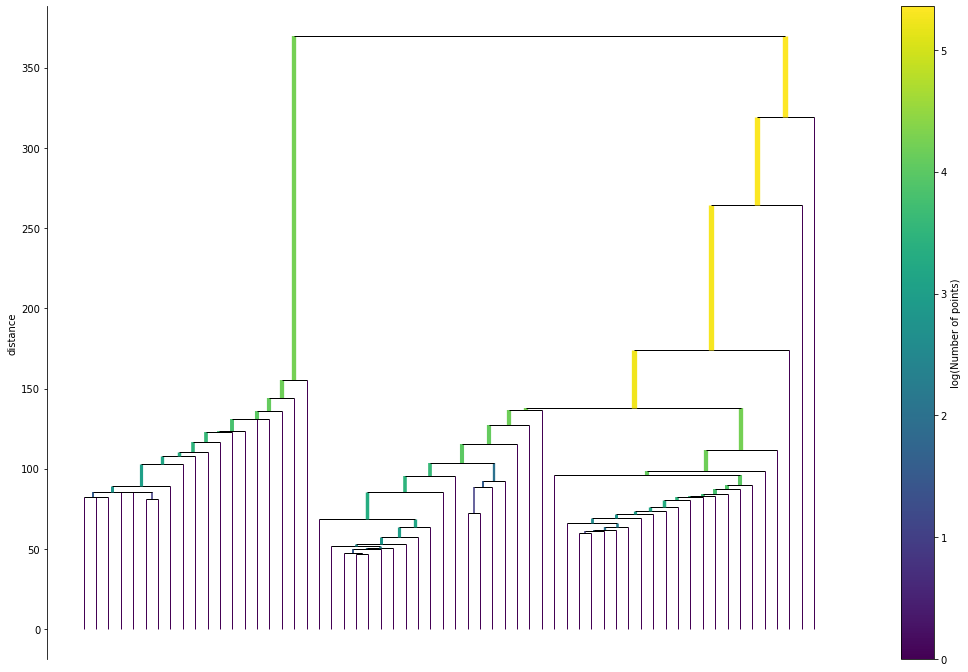

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(18, 12))
model.single_linkage_tree_.plot(cmap='viridis', colorbar=True, axis=ax)
plt.show()

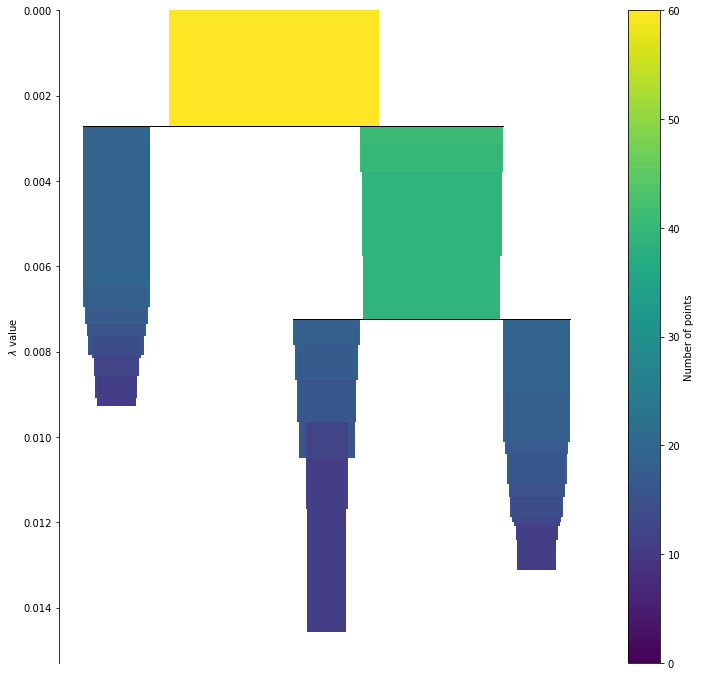

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
model.condensed_tree_.plot(axis=ax)
plt.show()

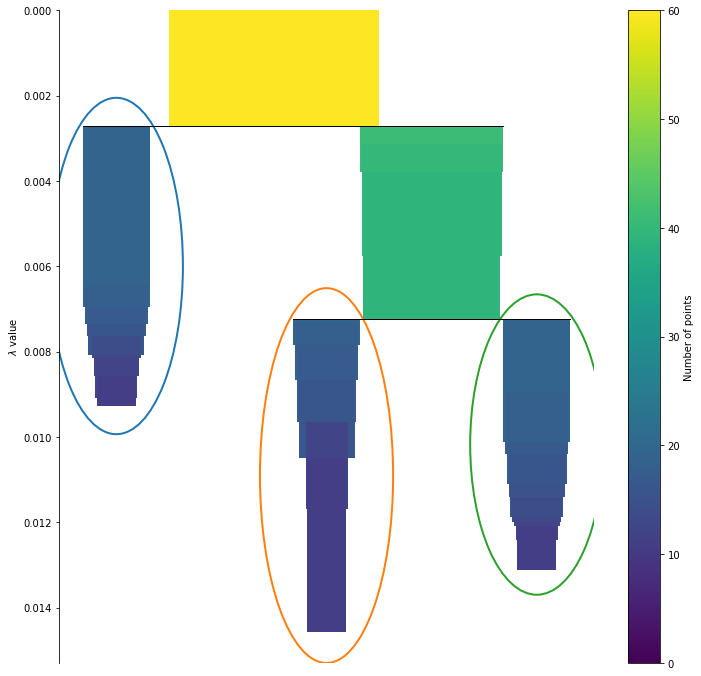

In [36]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
model.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette(), axis=ax)
plt.show()

In [38]:
from sklearn.metrics import silhouette_score
silhouette_score(distance_matrix, model.labels_, metric='precomputed')

0.6290706813378321

In [43]:
classes = [path.split('\\')[-1].split('-')[0] for path in paths]
for _class, label in zip(classes, list(model.labels_)):
    print(f'Class: {_class} - Label: {label}')

Class: apple - Label: 0
Class: apple - Label: 0
Class: apple - Label: 0
Class: apple - Label: 0
Class: apple - Label: 0
Class: apple - Label: 0
Class: apple - Label: 0
Class: apple - Label: 0
Class: apple - Label: 0
Class: apple - Label: 0
Class: apple - Label: 0
Class: apple - Label: 0
Class: apple - Label: 0
Class: apple - Label: 0
Class: apple - Label: -1
Class: apple - Label: 0
Class: apple - Label: 0
Class: apple - Label: 0
Class: apple - Label: 0
Class: apple - Label: 0
Class: personal_car - Label: 1
Class: personal_car - Label: 1
Class: personal_car - Label: 1
Class: personal_car - Label: 1
Class: personal_car - Label: -1
Class: personal_car - Label: 1
Class: personal_car - Label: 1
Class: personal_car - Label: 1
Class: personal_car - Label: 1
Class: personal_car - Label: 1
Class: personal_car - Label: 1
Class: personal_car - Label: 1
Class: personal_car - Label: 1
Class: personal_car - Label: 1
Class: personal_car - Label: 1
Class: personal_car - Label: 1
Class: personal_car - 